# Importando as bibliotecas necessárias

In [ ]:
import pandas as pd
import numpy as np
from sklearn import neighbors, metrics
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from mlxtend.plotting import plot_confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

# Importando o Dataset e gerando o Dataframe

In [ ]:
df_banknote_auth = pd.read_csv('https://pycourse.s3.amazonaws.com/banknote_authentication.txt', header=None, names=['variance','skewness', 'curtosis','entropy', 'class'])

In [ ]:
df_banknote_auth.head()

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


# Qual o tamanho desse dataset?

In [ ]:
df_banknote_auth.shape

(1372, 5)

# Qual variável possui o maior range (diferença entre valor máximo e mínimo)? 

In [ ]:
for column in df_banknote_auth.columns:
  column_max = float(df_banknote_auth[column].max())
  column_min = float(df_banknote_auth[column].min())
  diff = column_max-column_min 
  print(f"Para a coluna: {column} a diferença entre o valor máx. e min. é: {diff} ")

Para a coluna: variance a diferença entre o valor máx. e min. é: 13.8669 
Para a coluna: skewness a diferença entre o valor máx. e min. é: 26.7247 
Para a coluna: curtosis a diferença entre o valor máx. e min. é: 23.2135 
Para a coluna: entropy a diferença entre o valor máx. e min. é: 10.9977 
Para a coluna: class a diferença entre o valor máx. e min. é: 1.0 


# Qual a média da coluna skewness? 

In [ ]:
df_banknote_auth['skewness'].mean()

1.9223531206393603

# Qual a média da coluna entropy? 

In [ ]:
df_banknote_auth['entropy'].mean()

-1.191656520043731

# Qual a mediana da coluna variance

In [ ]:
df_banknote_auth['variance'].median()

0.49618

# Qual o desvio padrão da coluna curtosis? 

In [ ]:
df_banknote_auth['curtosis'].std()

4.310030090106595

# Qual a porcentagem de exemplos do dataset que são cédulas falsas (class=1)? 

In [ ]:
df_banknote_auth['class'].value_counts(normalize=True)

0    0.555394
1    0.444606
Name: class, dtype: float64

# Qual o valor da correlação de Pearson entre as variáveis skewness e curtosis? 

In [ ]:
df_banknote_auth.corr(method='pearson')

,variance,skewness,curtosis,entropy,class
variance,1.000000,0.264026,-0.380850,0.276817,-0.724843
skewness,0.264026,1.000000,-0.786895,-0.526321,-0.444688
curtosis,-0.380850,-0.786895,1.000000,0.318841,0.155883
entropy,0.276817,-0.526321,0.318841,1.000000,-0.023424
class,-0.724843,-0.444688,0.155883,-0.023424,1.000000


# Train Test Split

In [ ]:
#transforma os dados em array
X = df_banknote_auth.iloc[:, :-1].values  #dados de entrada
y = df_banknote_auth.iloc[:,4].values  # saídas ou target

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)# divide 30% para teste

# Qual a acurácia do KNN no conjunto de teste? 



[[234   1]
 [  0 177]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       235
           1       0.99      1.00      1.00       177

    accuracy                           1.00       412
   macro avg       1.00      1.00      1.00       412
weighted avg       1.00      1.00      1.00       412



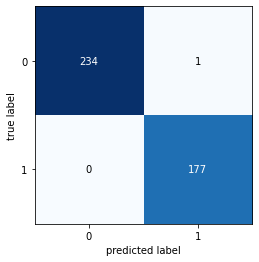

0.9975728155339806

In [ ]:
knn_clf = KNeighborsClassifier(n_neighbors=5) #utiliza a construção por meio de 5 vizinhos
knn_clf.fit(X_train, y_train) # aplica a classificação
#realiza a previsão
y_pred = knn_clf.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
matriz_confusao = confusion_matrix(y_test, y_pred)
fig, ax = plot_confusion_matrix(conf_mat=matriz_confusao)
plt.show()
accuracy_score(y_test, y_pred)

# Qual a acurácia da Árvore de Decisão no conjunto de teste? 



[[231   4]
 [  1 176]]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       235
           1       0.98      0.99      0.99       177

    accuracy                           0.99       412
   macro avg       0.99      0.99      0.99       412
weighted avg       0.99      0.99      0.99       412



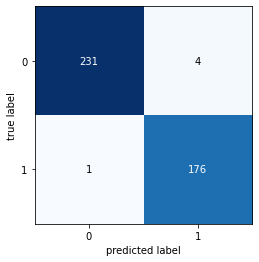

0.9878640776699029

In [ ]:
# Cria o objeto de classificação através do 
clf_dt = DecisionTreeClassifier()

# Realiza o treinamento do classificador
clf_dt = clf_dt.fit(X_train,y_train)

#Realiza a previsão de classificaçao 
y_pred = clf_dt.predict(X_test)

#Avaliando o modelo 

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

#realiza o plot da matriz de confusão
matriz_confusao = confusion_matrix(y_test, y_pred)

fig, ax = plot_confusion_matrix(conf_mat=matriz_confusao)
plt.show()



#visualização da árvore de decisão
#impor das bibliotecas necessárias para realizar a visualização da árvore de decisão
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

df_banknote_auth_features = df_banknote_auth.drop('class', axis=1)

dot_data = StringIO()
export_graphviz(clf_dt, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = df_banknote_auth_features.columns,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('clf_dt.png')
Image(graph.create_png())

accuracy_score(y_test, y_pred)

# Qual a acurácia do Random Forest no conjunto de teste? 

[[233   2]
 [  0 177]]
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       235
           1       0.99      1.00      0.99       177

    accuracy                           1.00       412
   macro avg       0.99      1.00      1.00       412
weighted avg       1.00      1.00      1.00       412



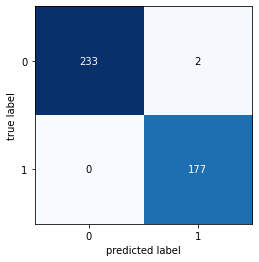

0.9951456310679612

In [ ]:
clf_floresta = RandomForestClassifier(max_depth=8, random_state=1)
clf_floresta.fit(X_train, y_train)
y_pred = clf_floresta.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
matriz_confusao = confusion_matrix(y_test, y_pred)
fig, ax = plot_confusion_matrix(conf_mat=matriz_confusao)
plt.show()
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

# Analisando o valor da importância relativa das features do Random Forest (atributo feature_importances_), qual feature melhor contribuiu para a predição de class? 

In [ ]:
clf_floresta.feature_importances_

array([0.56066718, 0.24058589, 0.14022782, 0.05851911])

# Qual o valor da importância relativa da feature skewness?

In [ ]:
clf_floresta.feature_importances_[1]

0.24058588894949182

# Qual a acurácia do SVM no conjunto de teste? 



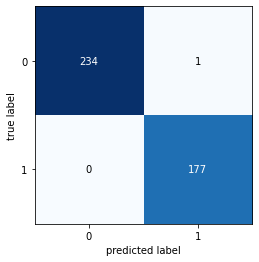

0.9975728155339806

In [ ]:
#cria o objeto SVM
clf_svm = SVC()
clf_svm.fit(X_train,y_train)   
#Avaliando o modelo 
#realiza o plot da matriz de confusão
matriz_confusao = confusion_matrix(y_test, y_pred)
fig, ax = plot_confusion_matrix(conf_mat=matriz_confusao)
plt.show()
accuracy_score(y_test, y_pred)

# Qual a acurácia da rede MLP no conjunto de teste? 

[[235   0]
 [  0 177]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       235
           1       1.00      1.00      1.00       177

    accuracy                           1.00       412
   macro avg       1.00      1.00      1.00       412
weighted avg       1.00      1.00      1.00       412



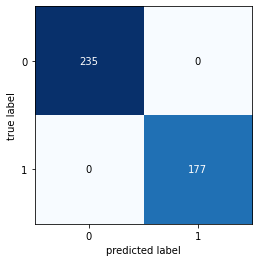

1.0

In [ ]:
clf_mlp = MLPClassifier(hidden_layer_sizes=(2,),random_state=1, max_iter=300)
clf_mlp.fit(X_train, y_train)
y_pred=clf_mlp.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
matriz_confusao = confusion_matrix(y_test, y_pred)
fig, ax = plot_confusion_matrix(conf_mat=matriz_confusao)
plt.show()
accuracy_score(y_test, y_pred)